In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
from pandas.tools.plotting import scatter_matrix

Read the crime data and Exploratory Data Analysis

In [4]:
df = pd.read_csv('data/crime.csv')

In [5]:
df

,State,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8
5,Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5
6,Connecticut,2.9,20.0,113.0,138.6,437.1,1824.1,296.8
7,Delaware,4.4,44.7,154.8,428.2,688.9,2144.0,278.5
8,District of Columbia,35.4,30.2,672.1,721.3,649.7,2694.9,1402.3
9,Florida,5.0,37.1,169.4,496.6,926.3,2658.3,423.3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
State                  51 non-null object
Murder                 51 non-null float64
Rape                   51 non-null float64
Robbery                51 non-null float64
Aggravated Assault     51 non-null float64
Burglary               51 non-null float64
Larceny Theft          51 non-null float64
Motor Vehicle Theft    51 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [15]:
df.describe()

,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,5.315686,33.729412,113.917647,269.388235,690.500000,2303.486275,383.215686
std,4.893971,11.276725,97.856147,146.327989,233.766624,514.729998,252.037659
min,1.100000,13.900000,7.400000,61.700000,311.900000,1343.700000,102.000000
25%,2.600000,26.250000,66.700000,152.100000,493.000000,1874.550000,218.850000
50%,4.800000,32.900000,98.700000,235.000000,649.700000,2412.000000,318.100000
75%,6.700000,40.100000,153.100000,362.200000,923.000000,2703.050000,421.950000
max,35.400000,81.100000,672.100000,721.300000,1201.100000,3308.400000,1402.300000


Which states have the highest/lowest rate of each of the seven crimes?

In [13]:
max_c=df[df.columns[1:]].idxmax()
zip(max_c.index, df.ix[max_c].State)

[('Murder', 'District of Columbia'),
 ('Rape', 'Alaska'),
 ('Robbery', 'District of Columbia'),
 ('Aggravated Assault', 'District of Columbia'),
 ('Burglary', 'North Carolina'),
 ('Larceny Theft', 'Hawaii'),
 ('Motor Vehicle Theft', 'District of Columbia')]

In [11]:
df[df.columns[1:]].idxmin()

Murder                 34
Rape                   30
Robbery                34
Aggravated Assault     19
Burglary               34
Larceny Theft          41
Motor Vehicle Theft    19
dtype: int64

check correlations of crime rates accross states

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104568990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cb2e1d0>]], dtype=object)

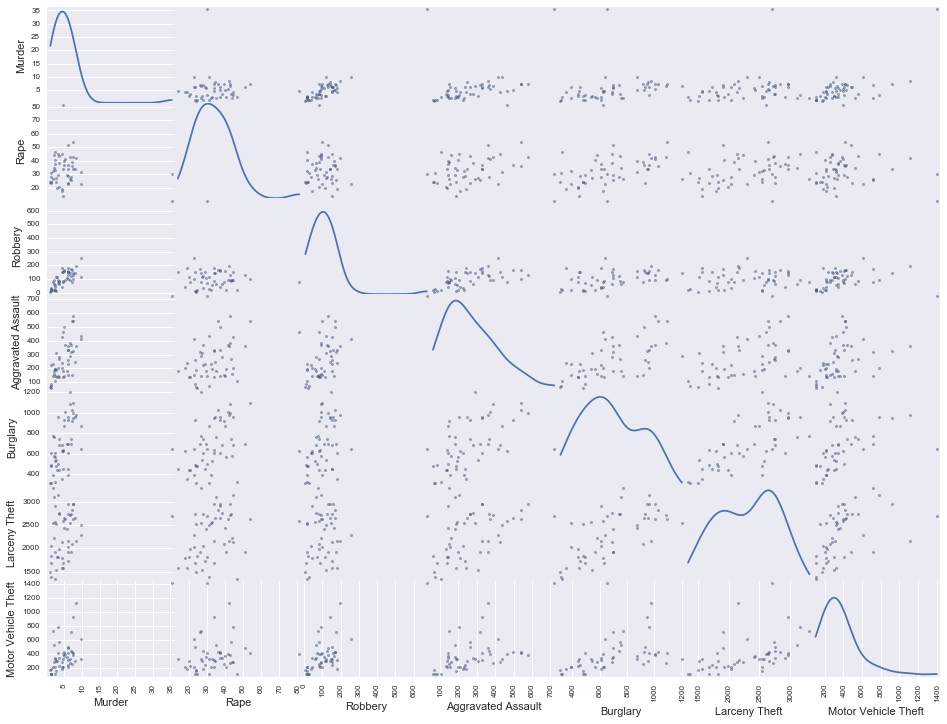

In [6]:
#plt.figure(figsize=(10,8))
scatter_matrix(df, figsize=(16,12), alpha= 0.6, diagonal='kde')
#scatter_matrix(df)

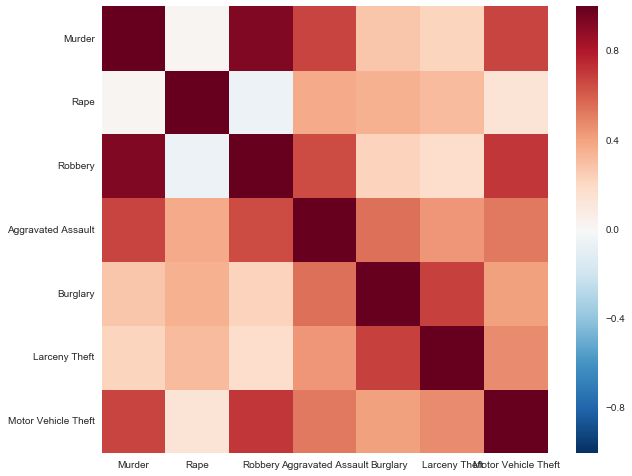

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())

histogram for each of the seven crimes to visualize their distributions

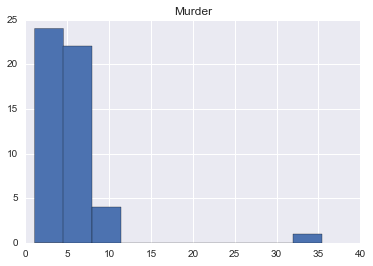

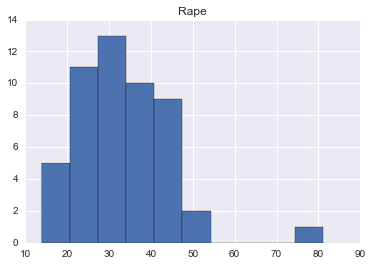

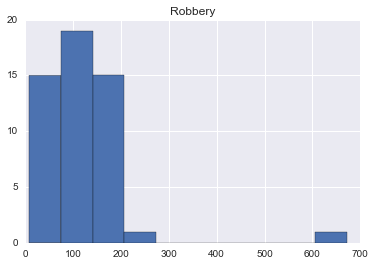

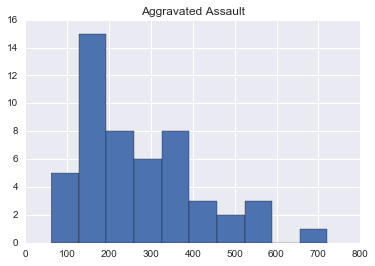

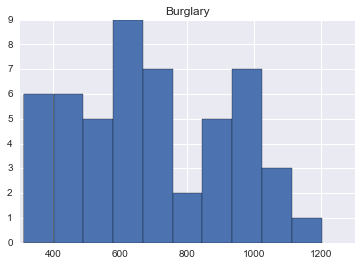

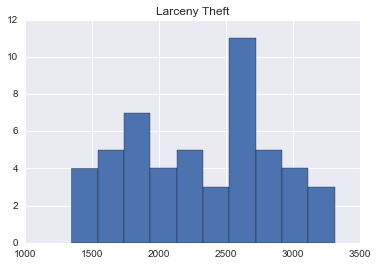

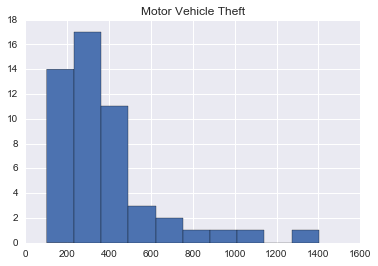

In [30]:
for crime in df.columns[1:]:
    f = plt.figure()
    hist = df[crime].hist()
    hist.set_title(crime)

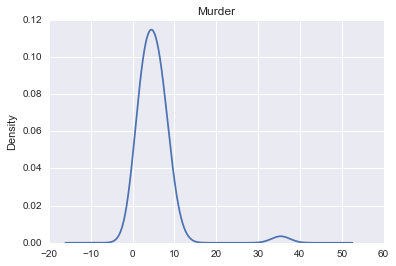

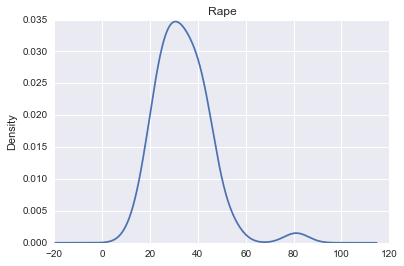

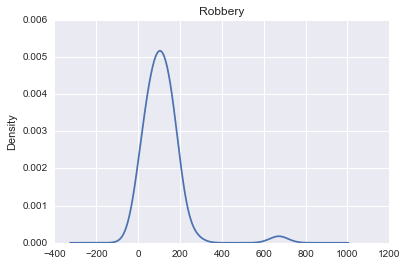

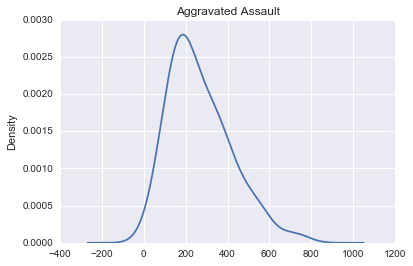

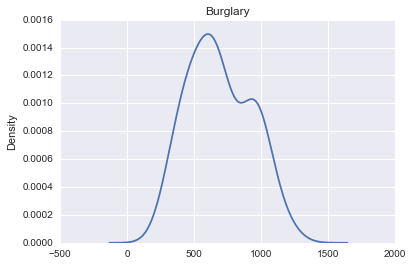

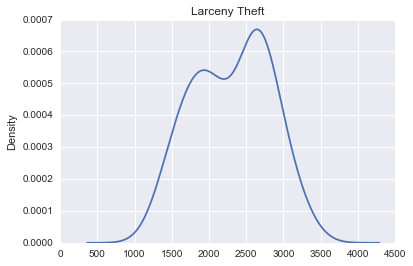

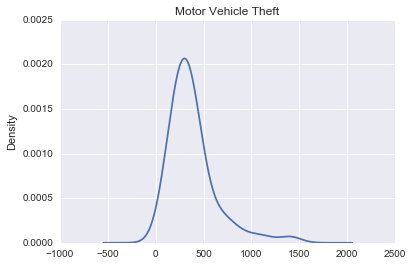

In [28]:
for crime in df.columns[1:]:
    f = plt.figure()
    hist = df[crime].plot(kind='kde')
    hist.set_title(crime)

[]

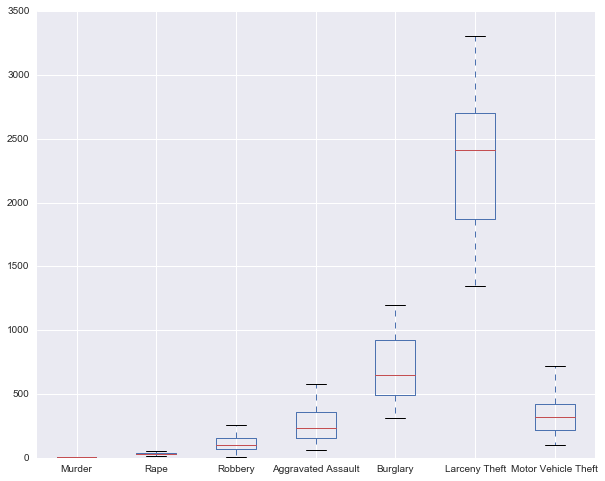

In [31]:
plt.figure(figsize=(10,8))
df.boxplot(figsize=(10,8), return_type= 'axes') #column= list(df.columns.values), 
plt.plot()

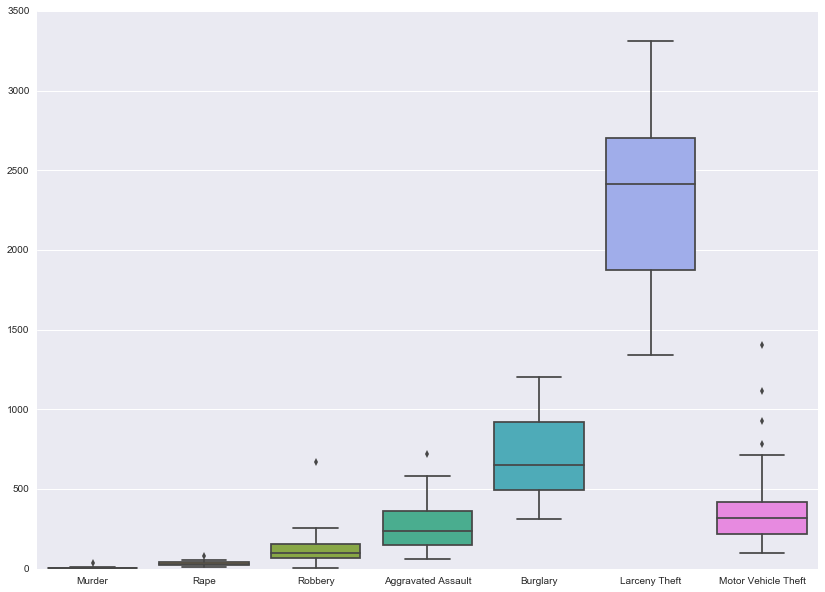

In [35]:
plt.figure(figsize=(14,10))
sns.boxplot(df)

/Users/weiansheng/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning:

The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



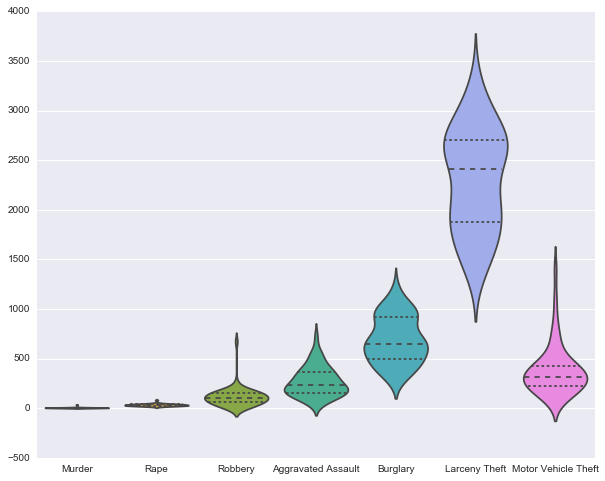

In [36]:
plt.figure(figsize=(10,8))
sns.violinplot(df, scale='count', inner='quartile')


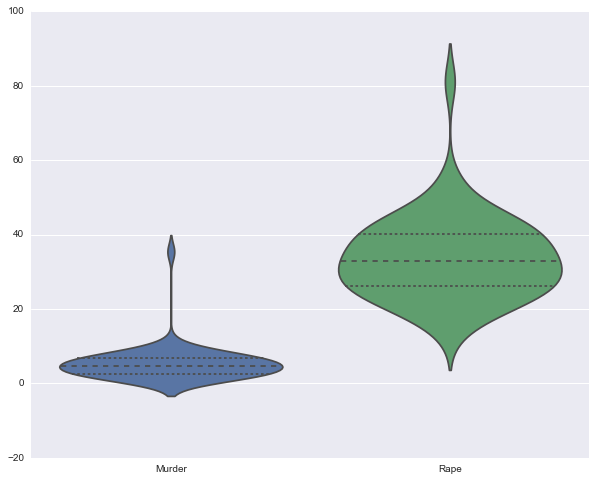

In [40]:
plt.figure(figsize=(10,8))
sns.violinplot(df[df.columns[1:3]], scale='count', inner='quartile')

Explanatory Data Visualization

In [47]:
df2=df.copy()
df2.set_index(df2.State, inplace=True)
df2=df2.drop('State',axis =1)
df2.head()

,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft
State,,,,,,,
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8


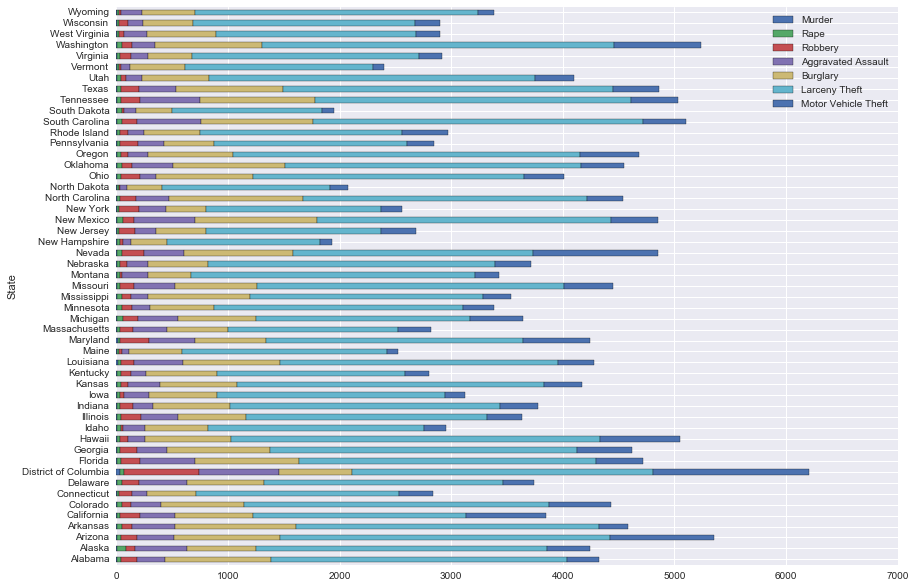

In [51]:
df2.plot(kind='barh', figsize=(14,10), stacked=True)

Create a stacked bar chart (with hover tooltips) to convey the total crime rate of each state without hiding the individual breakdown of crime type

In [72]:
def sum_crime(df):
    return sum(df[1:])
df['total'] = df.apply(sum_crime, axis=1)
sorted_df = df.sort_values('total', ascending=False)

/Users/weiansheng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [200]:
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.charts.utils import df_from_json

# from bokeh.models import *



bar = Bar(sorted_df,
          values=blend('Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary',
                       'Larceny Theft', 'Motor Vehicle Theft', name='Crime', labels_name='crime'),
          label=cat(columns='State', sort=False),
          stack=cat(columns='crime', sort=False),
          
          legend='top_right',
          title="Crime per state", 
          width=1000, height=500,
          tooltips=[('crime', '@crime'), ('state', '@State')]
         )


#output_file("stacked_bar.html", title="stacked_bar.py example")

show(bar)

In [83]:
def norm_crime(df):
    return df[1:] / df['total']
normed_df = sorted_df.apply(norm_crime, axis=1)

normed_df['State']=sorted_df['State']
normed_df.head()

,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft,total,State
8,0.005704,0.004866,0.108300,0.116228,0.104691,0.434248,0.225962,1.0,District of Columbia
2,0.001402,0.006316,0.026985,0.061184,0.177235,0.554129,0.172750,1.0,Arizona
47,0.000630,0.008532,0.017580,0.039282,0.183184,0.601164,0.149628,1.0,Washington
40,0.001451,0.008333,0.025900,0.113521,0.196240,0.579190,0.075367,1.0,South Carolina
11,0.000376,0.005329,0.015551,0.029280,0.152126,0.655414,0.141923,1.0,Hawaii


In [89]:
def plot(df):
    bar = Bar(df,
          values=blend('Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary',
                       'Larceny Theft', 'Motor Vehicle Theft', name='Crime', labels_name='crime'),
          label=cat(columns='State', sort=False),
          stack=cat(columns='crime', sort=False),
          
          legend='top_right',
          title="Crime per state", 
          width=1000, height=500,
          tooltips=[('crime', '@crime'), ('state', '@State')]
         )
    show(bar)

plot(normed_df)
#plot(sorted_df)

map, create a basic map of us states excluding HI and AK

In [103]:
from bokeh.sampledata import us_states
from bokeh.plotting import *

us_states = us_states.data.copy()

del us_states["HI"]
del us_states["AK"]

state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]

p = figure(title="State Crime Rates", toolbar_location="left",
plot_width=1100, plot_height=700)

p.patches(state_xs, state_ys, fill_alpha=0.0,
line_color="#884444", line_width=2)

show(p)


In [203]:
us_states

{'AL': {'lats': [30.99763,
   30.94243,
   30.89199,
   30.85923,
   30.83021,
   30.7996,
   30.75054,
   30.71531,
   30.68835,
   30.62914,
   30.58513,
   30.55648,
   30.52315,
   30.4782,
   30.4151,
   30.3412,
   30.3002,
   30.21934,
   30.21183,
   30.20594,
   30.19818,
   30.19616,
   30.19176,
   30.18656,
   30.17891,
   30.17738,
   30.17733,
   30.17707,
   30.177,
   30.17719,
   30.17956,
   30.17834,
   30.17674,
   30.17652,
   30.17652,
   30.17649,
   30.17687,
   30.1776,
   30.17789,
   30.17702,
   30.17615,
   30.17513,
   30.17455,
   30.17457,
   30.17342,
   30.16973,
   30.16417,
   30.16006,
   30.1556,
   30.15522,
   30.15038,
   30.14669,
   30.14656,
   30.14561,
   30.14469,
   30.14444,
   30.14443,
   30.14601,
   30.14715,
   30.14956,
   30.15248,
   30.15452,
   30.15634,
   30.16209,
   30.16638,
   30.16656,
   30.16697,
   30.16723,
   30.16774,
   30.16853,
   30.16962,
   30.17047,
   30.17208,
   30.17362,
   30.17541,
   30.17797,
   30.1

In [95]:
df2['Larceny Theft rate'] = df2['Larceny Theft']/df2.sum(axis=1)

In [137]:
df3 = df2[(df2.index!='Alaska') & (df2.index!='Hawaii')]

In [201]:
df3.head()

,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny Theft,Motor Vehicle Theft,Larceny Theft rate
State,,,,,,,,
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,0.612887
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,0.554129
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,0.591268
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,0.497934
Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,0.616605


In [110]:
us_states.values()[0]['name']

'Washington'

In [174]:
df3.ix[states[0]]

Murder                    3.300000
Rape                     44.700000
Robbery                  92.100000
Aggravated Assault      205.800000
Burglary                959.700000
Larceny Theft          3149.500000
Motor Vehicle Theft     783.900000
Larceny Theft rate        0.601164
Name: Washington, dtype: float64

Draw the state borders

Figure out the correct color mapping from (rate => hexadecimal value)

Put it all together with original source data

Add hover tooltip interaction

In [177]:
states=[a['name'] for a in us_states.values()]
rates = [df2.ix[state_name]['Larceny Theft'] for state_name in states]

In [91]:
cm = plt.get_cmap('YlOrRd')
c_map = plt.cm.ScalarMappable(cmap=cm)
c_map.set_clim(df2['Larceny Theft'].min(), df2['Larceny Theft'].max())

In [178]:
state_colors0=[c_map.to_rgba(rate) for rate in rates]
state_colors = [ (c[0] * 255, c[1] * 255, c[2] * 255) for c in state_colors0 ]
state_hex = [  ('#%02x%02x%02x' % c) for c in state_colors] 

In [179]:
# rates0=list(df3['Larceny Theft'].values)
# states0 = list(df3.index.values) 

In [180]:
rates

[3149.5,
 2144.0,
 2694.9000000000001,
 1992.8,
 1794.0,
 2658.3000000000002,
 2533.9000000000001,
 1377.3,
 1568.4000000000001,
 2639.9000000000001,
 2961.6999999999998,
 2494.5,
 2546.1999999999998,
 1500.3,
 2574.3000000000002,
 2828.0999999999999,
 1569.5999999999999,
 1729.0999999999999,
 1816.0,
 2153.9000000000001,
 2035.0,
 2735.1999999999998,
 2650.0,
 2711.1999999999998,
 1686.0999999999999,
 2164.8000000000002,
 2751.0999999999999,
 2412.0,
 2042.7,
 1527.4000000000001,
 2965.1999999999998,
 1916.5,
 1931.7,
 1824.0999999999999,
 1832.5999999999999,
 2294.3000000000002,
 2644.1999999999998,
 2429.0,
 2918.8000000000002,
 2746.1999999999998,
 2226.9000000000001,
 1917.8,
 2758.0999999999999,
 2543.0,
 2083.9000000000001,
 2954.0999999999999,
 1685.8,
 3112.1999999999998,
 1343.7]

draw the final map

In [186]:
from bokeh.sampledata import us_states
from bokeh.models import HoverTool
from collections import OrderedDict

us_states = us_states.data.copy()

del us_states["HI"]
del us_states["AK"]

state_xs = [us_states[code]["lons"] for code in us_states]
state_ys = [us_states[code]["lats"] for code in us_states]

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

source = ColumnDataSource(
    data=dict(
        rate=rates,
        state=states
    )
)

p = figure(title="State Crime Rates", toolbar_location="left",
    plot_width=1100, plot_height=700, tools=TOOLS)

p.patches(state_xs, state_ys, fill_color=state_hex,
    line_color="#884444", line_width=2, source=source)


hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("State", "@state"),
    ('rate', '@rate'),
    ("(x,y)", "($x, $y)"),
])

show(p)

In [204]:
ColumnDataSource

bokeh.models.sources.ColumnDataSource

In [196]:
state_colors

[(166.27451509237289, 0.0, 38.000001534819603),
 (253.73725497722626, 168.27843654155731, 71.796080753207207),
 (238.96078526973724, 50.878432966768742, 34.698039956390858),
 (254.00000005960464, 192.22353315353396, 91.317649215459824),
 (254.18039220571518, 220.60784518718719, 125.57647207379341),
 (242.88235366344452, 59.035296119749546, 36.894118554890156),
 (252.13725507259369, 86.647062301635728, 44.4705893844366),
 (255.0, 252.74117660522461, 198.47843474149704),
 (255.0, 238.62353038787842, 163.96863287687302),
 (245.23529469966888, 63.929414011538029, 38.211765713989735),
 (204.64706182479858, 10.705882497131823, 33.882353939116001),
 (252.32549035549164, 98.505886554718018, 47.858824476599693),
 (252.10588252544403, 84.670591592788696, 43.90588353574276),
 (255.0, 243.70588302612305, 176.39216154813766),
 (251.50980412960052, 76.980395056307316, 41.725491471588612),
 (224.91372728347778, 24.572549350559711, 28.549019910395145),
 (255.0, 238.62353038787842, 163.96863287687302),

In [172]:
df3['Larceny Theft'].sort_values()

State
South Dakota            1343.7
New Hampshire           1377.3
North Dakota            1500.3
Massachusetts           1527.4
New Jersey              1568.4
New York                1569.6
Kentucky                1685.8
Vermont                 1686.1
Pennsylvania            1729.1
West Virginia           1794.0
Rhode Island            1816.0
Connecticut             1824.1
Maine                   1832.6
California              1916.5
Michigan                1917.8
Idaho                   1931.7
Wisconsin               1992.8
Virginia                2035.0
Iowa                    2042.7
Mississippi             2083.9
Delaware                2144.0
Nevada                  2153.9
Illinois                2164.8
Minnesota               2226.9
Maryland                2294.3
Indiana                 2412.0
Ohio                    2429.0
Louisiana               2494.5
Wyoming                 2533.9
Montana                 2543.0
North Carolina          2546.2
Nebraska                2574.3
Ne